# TASK 5

# NER with spaCy

In [1]:
import spacy
from datasets import load_dataset
from collections import Counter

#load spaCy
nlp = spacy.load("en_core_web_sm")
dataset = load_dataset("ag_news", split="test[:50]")

#Extract entities
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

#Apply to data
ner_results = []
for item in dataset:
    text = item['text']
    entities = extract_entities(text)
    ner_results.append({
        "text": text,
        "entities": entities
    })


for i, result in enumerate(ner_results[:5]):
    print(f"\n=== News #{i+1} ===")
    print("Text:", result["text"])
    
    if result["entities"]:
        print("\nNamed Entities:")
        print("{:<20} -> {:<10}".format("Entity", "Label"))
        print("-" * 32)
        for ent, label in result["entities"]:
            print("{:<20} -> {:<10}".format(ent, label))
    else:
        print("\nNo named entities found.")



README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]


=== News #1 ===
Text: Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.

Named Entities:
Entity               -> Label     
--------------------------------
Turner               -> ORG       
Newall               -> ORG       
Federal Mogul        -> ORG       

=== News #2 ===
Text: The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com) SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.

Named Entities:
Entity               -> Label     
--------------------------------
Canada               -> GPE       
#36;10 million       -> MONEY     
Ansari X Prize       -> PERSON    
first\launch         -> DATE      

=== News #3 ===
Text: Ky. Company Wins Grant to Study 

# NER with Transformers

In [2]:
from datasets import load_dataset
import spacy
from transformers import pipeline

nlp_spacy = spacy.load("en_core_web_sm")

#BERT-based NER model
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", tokenizer="dslim/bert-base-NER", aggregation_strategy="simple")

dataset = load_dataset("ag_news", split="test[:5]")

for i, item in enumerate(dataset):
    text = item["text"]
    print(f"\n=== News #{i+1} ===")
    print("Text:", text)

    # spaCy NER
    doc = nlp_spacy(text)
    print("\nspaCy Entities:")
    print("{:<20} -> {:<10}".format("Entity", "Label"))
    print("-" * 32)
    for ent in doc.ents:
        print("{:<20} -> {:<10}".format(ent.text, ent.label_))

    # BERT NER
    bert_ents = ner_pipeline(text)
    print("\nBERT Entities:")
    print("{:<20} -> {:<10}".format("Entity", "Label"))
    print("-" * 32)
    for ent in bert_ents:
        print("{:<20} -> {:<10}".format(ent['word'], ent['entity_group']))


2025-05-06 22:27:22.421992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746570442.644092      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746570442.704515      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0



=== News #1 ===
Text: Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.

spaCy Entities:
Entity               -> Label     
--------------------------------
Turner               -> ORG       
Newall               -> ORG       
Federal Mogul        -> ORG       

BERT Entities:
Entity               -> Label     
--------------------------------
T N                  -> ORG       
Turner Newall        -> ORG       
Federal Mogul        -> ORG       

=== News #2 ===
Text: The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com) SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.

spaCy Entities:
Entity               -> Label     
--------------------------------
Canada

# POS Tagging (spaCy vs Transformer)

In [3]:
import spacy
from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

#Custom dataset
custom_data = [
    ("She quickly ran to the store.", ["PRON", "ADV", "VERB", "ADP", "DET", "NOUN", "PUNCT"]),
    ("Why did you leave so early?", ["ADV", "AUX", "PRON", "VERB", "ADV", "ADV", "PUNCT"]),
    ("The books on the shelf are old.", ["DET", "NOUN", "ADP", "DET", "NOUN", "AUX", "ADJ", "PUNCT"]),
    ("Although it was raining, they continued playing.", ["SCONJ", "PRON", "AUX", "VERB", "PUNCT", "PRON", "VERB", "VERB", "PUNCT"]),
    ("John, who is a doctor, lives in New York.", ["PROPN", "PUNCT", "PRON", "AUX", "DET", "NOUN", "PUNCT", "VERB", "ADP", "PROPN", "PROPN", "PUNCT"]),
    ("Reading books improves your vocabulary.", ["VERB", "NOUN", "VERB", "PRON", "NOUN", "PUNCT"]),
    ("He was seen running across the field.", ["PRON", "AUX", "VERB", "VERB", "ADP", "DET", "NOUN", "PUNCT"]),
    ("They might have been watching a movie.", ["PRON", "AUX", "AUX", "AUX", "VERB", "DET", "NOUN", "PUNCT"]),
    ("If I had known, I would have acted differently.", ["SCONJ", "PRON", "AUX", "VERB", "PUNCT", "PRON", "AUX", "AUX", "VERB", "ADV", "PUNCT"]),
    ("Despite his efforts, the plan failed miserably.", ["ADP", "DET", "NOUN", "PUNCT", "DET", "NOUN", "VERB", "ADV", "PUNCT"])
]

#Models
nlp = spacy.load("en_core_web_sm")
model_name = "vblagoje/bert-english-uncased-finetuned-pos"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)
bert_pipeline = pipeline("token-classification", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

#Results
all_tokens = []
true_labels = []
spacy_preds = []
bert_preds = []

for text, gold_tags in custom_data:
    #spaCy
    doc = nlp(text)
    tokens = [token.text for token in doc]
    spacy_tags = [token.pos_ for token in doc]

    #BERT
    bert_out = bert_pipeline(text)
    bert_words = [item["word"] for item in bert_out]
    bert_tags = [item["entity_group"] for item in bert_out]

    #Check for tokens number
    if len(tokens) != len(gold_tags) or len(tokens) != len(bert_tags):
        continue

    all_tokens.extend(tokens)
    true_labels.extend(gold_tags)
    spacy_preds.extend(spacy_tags)
    bert_preds.extend(bert_tags)


print("\n====== spaCy ======")
print("Accuracy:", accuracy_score(true_labels, spacy_preds))
print("F1-score:", f1_score(true_labels, spacy_preds, average="macro"))

print("\n====== BERT ======")
print("Accuracy:", accuracy_score(true_labels, bert_preds))
print("F1-score:", f1_score(true_labels, bert_preds, average="macro"))


df = pd.DataFrame({
    "Token": all_tokens,
    "True": true_labels,
    "spaCy": spacy_preds,
    "BERT": bert_preds
})
display(df)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at vblagoje/bert-english-uncased-finetuned-pos were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0



====== spaCy ======
Accuracy: 0.9333333333333333
F1-score: 0.8488888888888889

====== BERT ======
Accuracy: 0.9666666666666667
F1-score: 0.9654320987654322


,Token,True,spaCy,BERT
0,She,PRON,PRON,PRON
1,quickly,ADV,ADV,ADV
2,ran,VERB,VERB,VERB
3,to,ADP,ADP,ADP
4,the,DET,DET,DET
5,store,NOUN,NOUN,NOUN
6,.,PUNCT,PUNCT,PUNCT
7,The,DET,DET,DET
8,books,NOUN,NOUN,NOUN
9,on,ADP,ADP,ADP


# TASK 6

In [4]:
from datasets import load_dataset
from transformers import (
    AutoTokenizer, AutoModelForTokenClassification,
    DataCollatorForTokenClassification, TrainingArguments, Trainer
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

#Dataset
dataset = load_dataset("conll2003")
label_list = dataset["train"].features["ner_tags"].feature.names
id2label = {i: label for i, label in enumerate(label_list)}
label2id = {label: i for i, label in enumerate(label_list)}
num_labels = len(label_list)

#Tokenization
checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, word_ids in enumerate(tokenized_inputs.word_ids(batch_index=i) for i in range(len(examples["tokens"]))):
        label_ids = []
        previous_word_idx = None
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:
                label_ids.append(examples["ner_tags"][i][word_idx])
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_datasets = dataset.map(tokenize_and_align_labels, batched=True)

#Model
model = AutoModelForTokenClassification.from_pretrained(checkpoint, num_labels=num_labels)
data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

#Training args
training_args = TrainingArguments(
    output_dir="./bert-ner-sklearn",
    eval_strategy="epoch",
    save_strategy="no",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_steps=10,
    report_to="none"
)

#Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()

#Test predictions
predictions, labels, _ = trainer.predict(tokenized_datasets["test"])
preds = np.argmax(predictions, axis=2)

true_tags = []
pred_tags = []

for pred, label in zip(preds, labels):
    for p, l in zip(pred, label):
        if l != -100:
            true_tags.append(id2label[l])
            pred_tags.append(id2label[p])


print("\n=== Evaluation ===")
print(f"Accuracy:  {accuracy_score(true_tags, pred_tags):.4f}")
print(f"Precision: {precision_score(true_tags, pred_tags, average='macro'):.4f}")
print(f"Recall:    {recall_score(true_tags, pred_tags, average='macro'):.4f}")
print(f"F1-score:  {f1_score(true_tags, pred_tags, average='macro'):.4f}")
print("\nClassification Report:\n")
print(classification_report(true_tags, pred_tags, digits=4))


README.md:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

conll2003.py:   0%|          | 0.00/9.57k [00:00<?, ?B/s]

The repository for conll2003 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/conll2003.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_31/1644026573.py:61: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.048600,0.054255



=== Evaluation ===
Accuracy:  0.9790
Precision: 0.8734
Recall:    0.8898
F1-score:  0.8813

Classification Report:

              precision    recall  f1-score   support

       B-LOC     0.9209    0.9209    0.9209      1668
      B-MISC     0.7924    0.7721    0.7821       702
       B-ORG     0.8867    0.9043    0.8954      1661
       B-PER     0.9663    0.9573    0.9618      1617
       I-LOC     0.8159    0.8794    0.8464       257
      I-MISC     0.6460    0.6759    0.6606       216
       I-ORG     0.8535    0.9138    0.8826       835
       I-PER     0.9837    0.9913    0.9875      1156
           O     0.9955    0.9930    0.9942     38323

    accuracy                         0.9790     46435
   macro avg     0.8734    0.8898    0.8813     46435
weighted avg     0.9794    0.9790    0.9792     46435



# TASK 7

In [5]:
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np
import torch

#Data loading
dataset = load_dataset("imdb")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=256)

#Tokenization
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets.set_format("torch", columns=["input_ids", "attention_mask", "label"])

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [6]:
# Fine-tuning BERT
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

training_args = TrainingArguments(
    output_dir="./bert-IMDB",
    eval_strategy="epoch",
    save_strategy="no",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=10,
    report_to="none"
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"].shuffle(seed=42).select(range(5000)),
    eval_dataset=tokenized_datasets["test"].select(range(1000)),
)

trainer.train()

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.309100,0.398160
2,0.225100,0.405436
3,0.116000,0.350781


TrainOutput(global_step=471, training_loss=0.24026254558591706, metrics={'train_runtime': 418.4871, 'train_samples_per_second': 35.843, 'train_steps_per_second': 1.125, 'total_flos': 1973332915200000.0, 'train_loss': 0.24026254558591706, 'epoch': 3.0})

In [7]:
# Оценка BERT
predictions = trainer.predict(tokenized_datasets["test"].select(range(1000)))
preds_bert = np.argmax(predictions.predictions, axis=-1)
labels_bert = predictions.label_ids

print("BERT Accuracy:", accuracy_score(labels_bert, preds_bert))
print("BERT F1:", f1_score(labels_bert, preds_bert, average="weighted"))
print("BERT Confusion Matrix:\n", confusion_matrix(labels_bert, preds_bert))


BERT Accuracy: 0.876
BERT F1: 0.933901918976546
BERT Confusion Matrix:
 [[876 124]
 [  0   0]]


# LSTM

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

max_words = 20000
max_len = 200
embedding_dim = 128

#Data processing
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

#Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
#Training
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/10
625/625 - 15s - 24ms/step - accuracy: 0.7763 - loss: 0.4609 - val_accuracy: 0.8550 - val_loss: 0.3401
Epoch 2/10
625/625 - 10s - 16ms/step - accuracy: 0.9155 - loss: 0.2307 - val_accuracy: 0.8332 - val_loss: 0.4511
Epoch 3/10
625/625 - 10s - 16ms/step - accuracy: 0.9546 - loss: 0.1315 - val_accuracy: 0.8592 - val_loss: 0.4693
Epoch 4/10
625/625 - 10s - 16ms/step - accuracy: 0.9663 - loss: 0.0975 - val_accuracy: 0.8386 - val_loss: 0.4482


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step

Test Accuracy: 0.8508
Test F1 Score: 0.8569


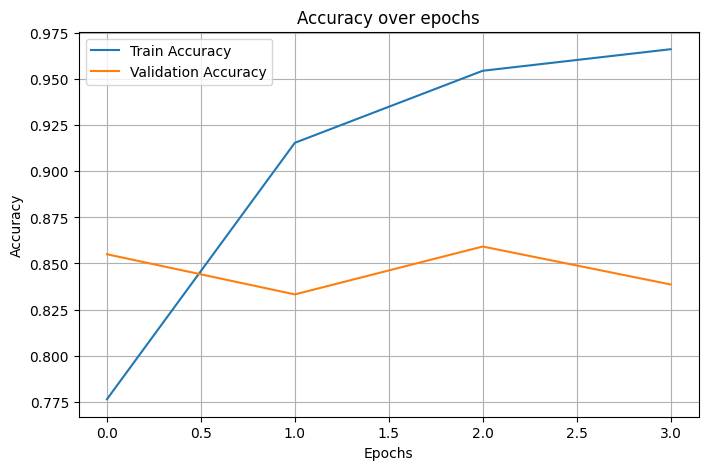

In [17]:
#Evaluation
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

print(f"\nTest Accuracy: {acc:.4f}")
print(f"Test F1 Score: {f1:.4f}")

#Visualization
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
